<br>
<font color="#444499" size="6">Practicing linear Regression in Ozone dataset</font>

# Context

Studying the correlation between ozone levels and various environmental parameters such as temperature, rain, wind, and natural factors is important for understanding the impact of these factors on air quality. Ozone, a major component of smog, is a harmful air pollutant that can have negative effects on human health and the environment. By understanding the correlation between ozone levels and various environmental parameters, scientists and policymakers can develop strategies to reduce ozone pollution and improve air quality.

# Objective

One possible approach for studying this correlation is to collect data on ozone levels and environmental parameters over time and use statistical techniques to identify any patterns or relationships between the two. For example, high temperatures and low winds may be associated with increased ozone levels, while high rainfall and cloud cover may be associated with decreased ozone levels. By identifying these patterns, scientists can develop hypotheses about the underlying causes of ozone pollution and test these hypotheses using further analysis and experimentation.

# Variables

This file contains variables such as:

- MaxO3, which is the maximum value of ozone observed over a day;
- T9, T12 and T15 which are the temperatures taken respectively at 9 h, 12 h and 15 h ;
- Ne9, Ne12, Ne15 which are clouds taken at 9 am, 12 pm and 3 pm;
Vx9, Vx12 and Vx15 which are the east-west wind components measured at 9 am, 12 pm and 3 pm;
- MaxO3V, which gives the maximum ozone level observed the previous day;
- wind, the wind direction at 12:00 noon;
- rain, the presence or absence of rain.

# Data Importation

This step involves importing the dataset into a software environment 

In [1]:
import pandas as pd

# Import the dataset
data = pd.read_csv('..\Dataset\ozone.txt', sep=";", decimal=',')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   obs     114 non-null    int64  
 1   maxO3   112 non-null    float64
 2   T9      112 non-null    float64
 3   T12     112 non-null    float64
 4   T15     112 non-null    float64
 5   Ne9     112 non-null    float64
 6   Ne12    112 non-null    float64
 7   Ne15    112 non-null    float64
 8   Vx9     112 non-null    float64
 9   Vx12    112 non-null    float64
 10  Vx15    112 non-null    float64
 11  maxO3v  112 non-null    float64
 12  vent    112 non-null    object 
 13  pluie   112 non-null    object 
dtypes: float64(11), int64(1), object(2)
memory usage: 12.6+ KB
None


# Data Cleaning

This step involves cleaning the dataset to remove any missing or incorrect values.

In [2]:
# Check for missing values
print(data.isnull().sum())

# Drop missing values
data = data.dropna()

obs       0
maxO3     2
T9        2
T12       2
T15       2
Ne9       2
Ne12      2
Ne15      2
Vx9       2
Vx12      2
Vx15      2
maxO3v    2
vent      2
pluie     2
dtype: int64


# Summarize the Data


This step involves generating summary statistics for the dataset, such as mean, median, and standard deviation.

In [3]:
# Generate summary statistics
print(data.describe())

              obs       maxO3          T9         T12         T15         Ne9  \
count  112.000000  112.000000  112.000000  112.000000  112.000000  112.000000   
mean   763.205357   90.303571   18.360714   21.526786   22.627679    4.928571   
std    110.149705   28.187225    3.122726    4.042321    4.530859    2.594916   
min    601.000000   42.000000   11.300000   14.000000   14.900000    0.000000   
25%    701.750000   70.750000   16.200000   18.600000   19.275000    3.000000   
50%    729.500000   81.500000   17.800000   20.550000   22.050000    6.000000   
75%    829.250000  106.000000   19.925000   23.550000   25.400000    7.000000   
max    930.000000  166.000000   27.000000   33.500000   35.500000    8.000000   

             Ne12        Ne15         Vx9        Vx12        Vx15      maxO3v  
count  112.000000  112.000000  112.000000  112.000000  112.000000  112.000000  
mean     5.017857    4.830357   -1.214346   -1.611004   -1.690683   90.571429  
std      2.281860    2.332259 

In [4]:
data.head() 

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
1,601,87.0,15.6,18.5,18.4,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0,Nord,Sec
2,602,82.0,17.0,18.4,17.7,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0,Nord,Sec
3,603,92.0,15.3,17.6,19.5,2.0,5.0,4.0,2.9544,1.8794,0.5209,82.0,Est,Sec
4,604,114.0,16.2,19.7,22.5,1.0,1.0,0.0,0.9848,0.3473,-0.1736,92.0,Nord,Sec
5,605,94.0,17.4,20.5,20.4,8.0,8.0,7.0,-0.5000,-2.9544,-4.3301,114.0,Ouest,Sec


# Visualise the data

This step involves creating visualizations of the data, such as histograms, scatter plots, and box plots, to help identify patterns and trends.

C:\Users\Ibrahim-Lahlou\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

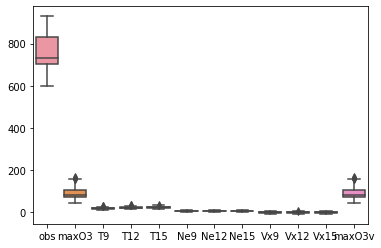

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for each column in the DataFrame
sns.boxplot(data=data)

C:\Users\Ibrahim-Lahlou\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

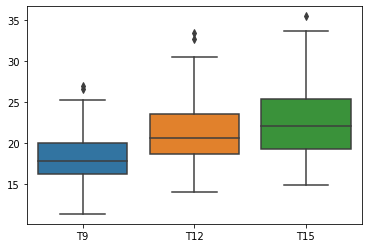

In [6]:
# Create a boxplot for the temperatures taken respectively at 9 h, 12 h and 15 h
cols = [ 'T9', 'T12','T15']
sns.boxplot(data=data[cols])

We can plot the point cloud maxO3 as a function of T15:

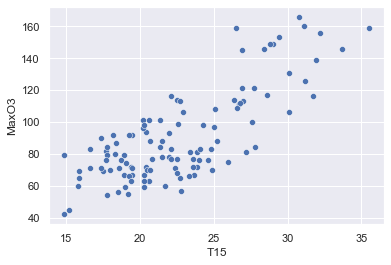

In [7]:
sns.set()

ax = sns.scatterplot(x="T15", y="maxO3", data=data)
ax.set(xlabel='T15', ylabel='MaxO3')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

This scatter makes us think of an alignment according to a shape that is not very far from a line.

<AxesSubplot: xlabel='pluie', ylabel='count'>

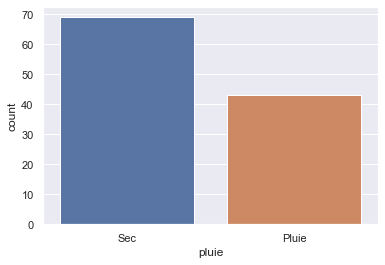

In [8]:
sns.countplot(x='pluie', data=data)

<AxesSubplot: xlabel='vent', ylabel='count'>

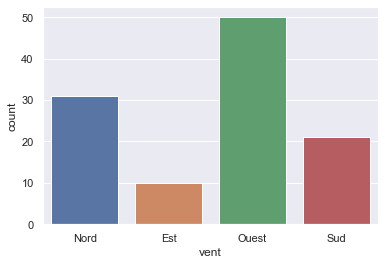

In [9]:
sns.countplot(x='vent', data=data)

# Identify outliers and anomalies:

In [10]:
import numpy as np
# Calculate the z-scores
from scipy import stats
data = data.select_dtypes(include=np.number)
z = np.abs(stats.zscore(data))
outliers = data[(z > 3).any(axis=1)]

In [11]:
print(outliers)

Empty DataFrame
Columns: [obs, maxO3, T9, T12, T15, Ne9, Ne12, Ne15, Vx9, Vx12, Vx15, maxO3v]
Index: []


# Test for relationships:

<AxesSubplot: >

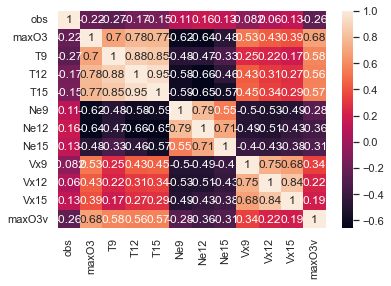

In [12]:
# Create a heatmap to show the correlation between variables
sns.heatmap(data.corr(), annot=True)

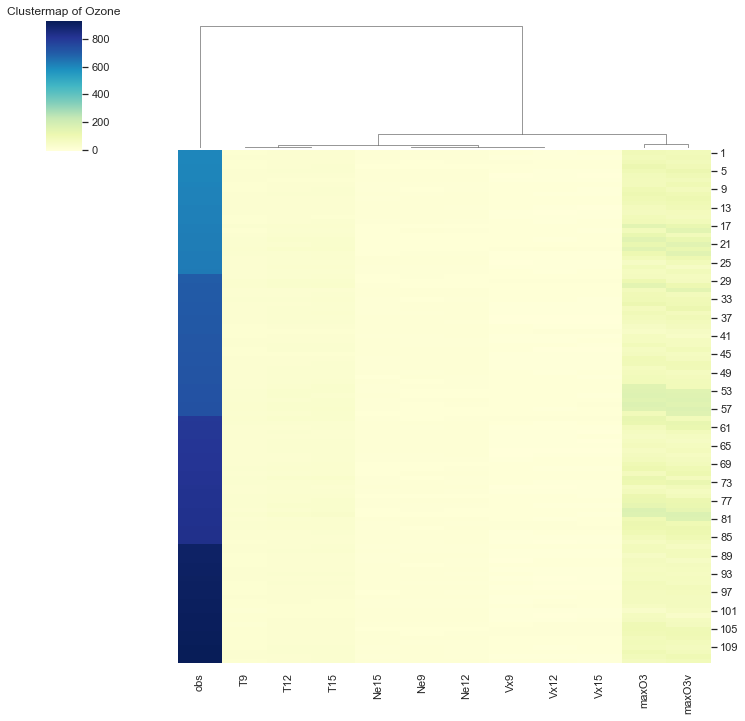

In [13]:
# Create a clustermap to visualize  the relationship between multiple 
#numeric variables in a dataset and group similar observations together

sns.clustermap(data, cmap='YlGnBu', row_cluster=False)
plt.title('Clustermap of Ozone')
plt.show()

# Hypothesis

This is some hypothesis 
- As temperature increases, ozone levels will also increase.
- More clouds in the sky will lead to lower ozone levels.
- Higher wind speeds will lead to lower ozone levels.
- More rain will lead to lower ozone levels.
- As temperature increases, ozone levels will decrease if clouds and wind increase.
- Higher ozone levels are associated with lower cloud cover and higher wind speeds.
- As temperature increases, ozone levels will decrease if rain is expected.
- Ozone levels are negatively correlated with both temperature and wind speed.

# Realising Regression

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Simple Linear Regression

### Statistic studies

In [15]:
reg_simp = smf.ols('maxO3 ~ T12', data=data).fit()
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     175.8
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.51e-24
Time:                        16:10:44   Log-Likelihood:                -478.91
No. Observations:                 112   AIC:                             961.8
Df Residuals:                     110   BIC:                             967.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.4196      9.033     -3.035      0.0

We obtain statistics on the obtained coefficients: their value, their standard deviation, the Student's test statistic, and the p-value (the test performed on the parameter is here the significance test: the parameter is worth 0 versus the parameter is different from 0), as well as statistics on the general model ($R^{2}$, $AIC$, etc...)

*The p-values are less than 5%. At a test level of 5%, we therefore reject the hypothesis that the parameter is equal to 0: the parameters are therefore significantly different from 0.
Here we see that the variable T12 is significant.*

As for the $R^{2}$, it is about 0.6. This is not very high, but it is logical considering the dispersion of the original scatter plot.


### Visualising 

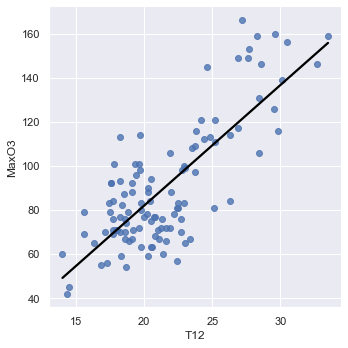

In [16]:
ax = sns.lmplot(x="T12", y="maxO3", data=data, ci=None, line_kws={'color':'black'})
ax.set(xlabel='T12', ylabel='MaxO3')
plt.show()

The line that appears is the first bisector. If the model were perfect, the actual and fitted values would be equal, so on such a graph, the points would line up on the line with equation 𝑦=𝑥
 , which is the first bisector.

### Residual Model

In [17]:
data['residu_s'] = reg_simp.resid

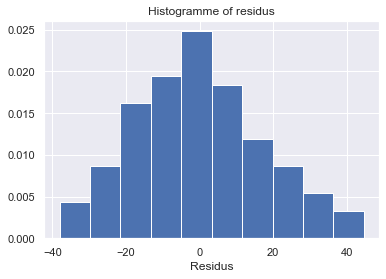

In [18]:
plt.hist(data['residu_s'], density=True)
plt.xlabel('Residus')
plt.title('Histogramme of residus')
plt.show()

The look of the histogram is quite classical: centered and roughly symmetrical.

### Prevision of ozones's Concentration 

Now let's predict the ozone concentration for one day. Knowing that the expected temperature for that day is 19°C, we can use our regression model for forecasting purposes!

In [19]:
prev = pd.DataFrame({'T12':[19]})
maxO3_prev = reg_simp.predict(prev)
print(round(maxO3_prev[0], 2))

76.49


This gives an ozone concentration of about 76.49.

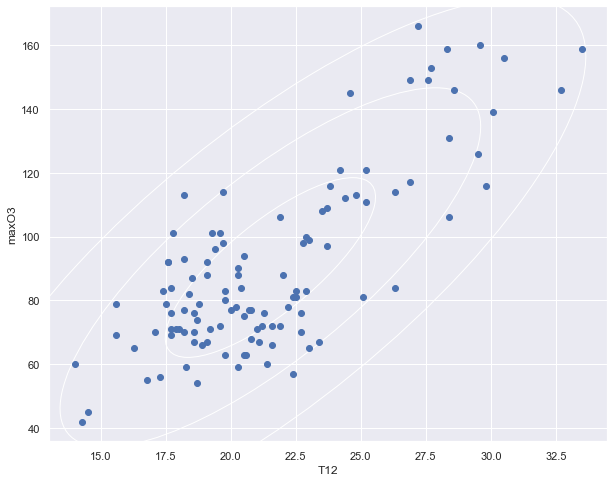

In [20]:
from matplotlib.patches import Ellipse

x = data['T12']
y = data['maxO3']
cov = np.cov(x, y)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)

fig, ax = plt.subplots(figsize=(10,8))
for j in range(1, 4):
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ax.add_artist(ell)
    
plt.xlabel("T12")
plt.ylabel("maxO3")
plt.scatter(x, y)
plt.show()



The ellipses are used to represent the level of confidence in the relationship between 'T12' and 'maxO3'. The larger the ellipse, the higher the level of confidence in the relationship.

The first level of the ellipse in the plot represents the region of highest probability density for the observed data points, as they are closest to the mean. 

So far, the linear regression involves only one explanatory variable. Later we will see more complex linear regressions with more explanatory variables, like other temperatures, wind speeds, etc.

### Statistic studies

In [21]:
reg_multi = smf.ols('maxO3~T9+T12+T15+Ne9+Ne12+Ne15+maxO3v', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     45.68
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           6.06e-29
Time:                        16:10:45   Log-Likelihood:                -453.71
No. Observations:                 112   AIC:                             923.4
Df Residuals:                     104   BIC:                             945.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.7055     13.109      0.969      0.3

We see here that some parameters are not significantly different from 0, because their p-value is not less than 5%, the level of test we want.

The $R^{2}$ is about 0.75, and the adjusted $R^{2}$ is about 0.74.

*This value is higher than in simple linear regression, and this makes sense, because when we add potential explanatory variables, we naturally increase the value of these $R^{2}$.*

### Remove insignificant variables

We will now remove the non-significant variables. We start with the least significant: Ne15, because it has a p-value of 0.93.

In [22]:
reg_multi = smf.ols('maxO3~T9+T12+T15+Ne9+Ne12+maxO3v', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     53.80
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           7.91e-30
Time:                        16:10:45   Log-Likelihood:                -453.71
No. Observations:                 112   AIC:                             921.4
Df Residuals:                     105   BIC:                             940.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8492     12.950      0.992      0.3

We see that Ne12, with a p-value of 0.79, is now the least significant. We therefore remove it.

In [23]:
reg_multi = smf.ols('maxO3~T9+T12+T15+Ne9+maxO3v', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     65.11
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           9.62e-31
Time:                        16:10:45   Log-Likelihood:                -453.75
No. Observations:                 112   AIC:                             919.5
Df Residuals:                     106   BIC:                             935.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2844     11.534      0.978      0.3

We see that we must now remove the variable T9 

In [24]:
reg_multi = smf.ols('maxO3~T12+T15+Ne9+maxO3v', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     81.55
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.33e-31
Time:                        16:10:46   Log-Likelihood:                -454.06
No. Observations:                 112   AIC:                             918.1
Df Residuals:                     107   BIC:                             931.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1368     11.168      0.818      0.4

And then T15 is removed:

In [25]:
reg_multi = smf.ols('maxO3~T12+Ne9+maxO3v', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     109.1
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.46e-32
Time:                        16:10:46   Log-Likelihood:                -454.30
No. Observations:                 112   AIC:                             916.6
Df Residuals:                     108   BIC:                             927.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7622     11.100      0.879      0.3

We notice that now, all the parameters are significant. As for the $R^{2}$, it is about 0.75, as is the adjusted $R^{2}$.

*We can therefore use this model for forecasting purposes!

If we want to forecast the daily ozone concentration, knowing that the predicted temperature at 12:00 pm will be 15°C, that the value of Ne9 will be 2, and that the maxO3v concentration of the previous day is 100, then we enter the following lines:

### Prevision of ozones's Concentration 

In [26]:
prev2 = pd.DataFrame({'T12': 15, 'Ne9': 2, 'maxO3v': 100}, index=[0])
maxO3_prev = reg_multi.predict(prev2)
print(round(maxO3_prev[0], 2))

84.08


### Result Analysis

#### Parametres

Analyze the results , We are going to carry out the tests here at a $\alpha=5$% level:

In [27]:
alpha = 0.05

Let's get $n$, the number of individuals in the sample, and $p$, the number of variables.

In [28]:
n = data.shape[0]
p = 4

We will conduct analyses on atypical and/or influential values by working on a dataframe called analyses.

In [29]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

#### Calculate the leverage

We can calculate the levers like this, knowing that the threshold for the levers is $2∗\frac{p}{n}$.

In [30]:
analyses['lever'] = reg_multi.get_influence().hat_matrix_diag

lever_threshold = 2*p/n

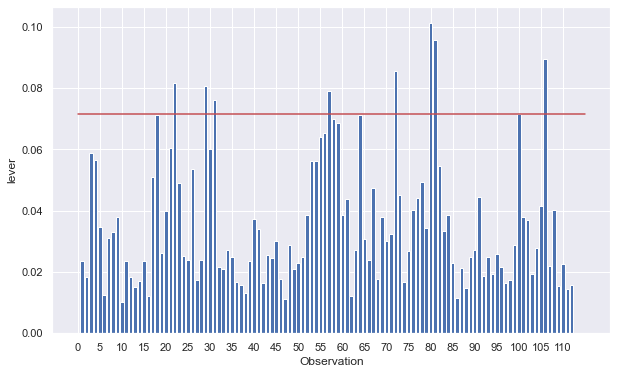

In [31]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['lever'])
plt.xticks(np.arange(0, 115, step=5))
plt.xlabel('Observation')
plt.ylabel('lever')
plt.plot([0, 115], [lever_threshold, lever_threshold], color='r')
plt.show()

To select the points for which the leverage is greater than the threshold, the following line is executed:

In [32]:
analyses.loc[analyses['lever'] > lever_threshold, :]

,obs,lever
21,22,0.081663
28,29,0.080777
30,31,0.076282
56,57,0.079123
71,72,0.085491
79,80,0.101387
80,81,0.095683
99,100,0.071728
105,106,0.089376


#### Calculate the Studentized Residuals

If we now wish to calculate the studentized residuals, we write this, knowing that the threshold for the studentized residuals is a Student's law with n-p-1 degrees of freedom:

In [33]:
from scipy.stats import t, shapiro

analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

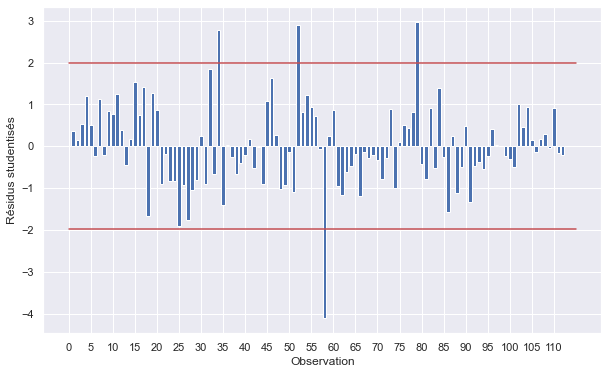

In [34]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 115, step=5))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 115], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 115], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

#### Determine Cook's distance

To find the Cook distance, we run this:

In [35]:
influence = reg_multi.get_influence().summary_frame()

The Cook distance threshold is n-p.

In [36]:
analyses['dcooks'] = influence['cooks_d']
dcook_threshold = 4/(n-p)

Influential observations can be detected like this:

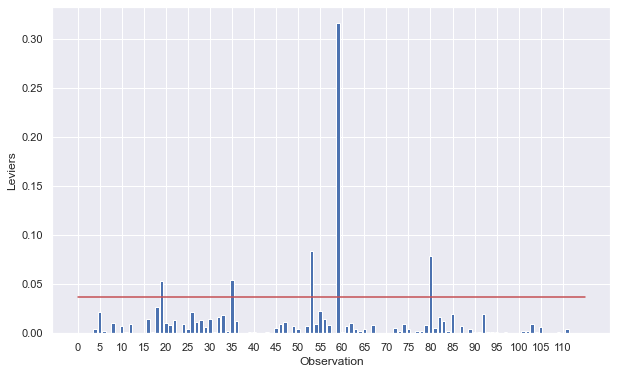

In [37]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 115, step=5))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 115], [dcook_threshold, dcook_threshold], color='r')
plt.show()

Points are removed only after verifying that they are indeed atypical, or even outliers, in view of the estimated model.

#### Check the collinearity of the variables

Another thing to check is the possible approximate collinearity of the variables:

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[2.0678328061249007, 1.5277727396873015, 1.4747178841142814]

Here, all coefficients are less than 10, so there is no collinearity problem.

#### Test for homoscedasticity

We can also test the homoscedasticity (i.e. the constancy of the variance) of the residuals:

In [39]:
import statsmodels.stats.diagnostic as diagnos

_, pval, __, f_pval = diagnos.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.07865197865995636


The p-value here is not less than $5$%, we do not reject the hypothesis $H0$ that the variances are constant (the homoscedasticity hypothesis).

#### Test the normality of the residuals

If we want to test the normality of the residuals, we can do a Shapiro-Wilk test.

In [40]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9623235464096069, pvalue=0.0030248425900936127)

Here, the normality hypothesis is questioned (p-value = 0.003 < 0.05).

Nevertheless, the observation of the residuals, the fact that they are not very different from a symmetrical distribution, and the fact that the sample size is sufficient (greater than 30) allow us to say that **the results obtained by the linear Gaussian model are not absurd**, even if the residual is not considered to be Gaussian.

We could also have automatically selected a model with all the available variables (weather variables and ozone peak of the previous day):

In [41]:
from Script.functions import *

columns = ['maxO3','T9','T12','T15','Ne9','Ne12','Ne15','maxO3v']
reg_backward = backward_selected(data[columns], 'maxO3')

_______________________________
maxO3 ~ T12 + Ne15 + Ne9 + T9 + maxO3v + T15 + Ne12 + 1
remove Ne15 (p-value : 0.928 )

_______________________________
maxO3 ~ T12 + Ne9 + T9 + maxO3v + T15 + Ne12 + 1
remove Ne12 (p-value : 0.787 )

_______________________________
maxO3 ~ T12 + Ne9 + T9 + maxO3v + T15 + 1
remove T15 (p-value : 0.481 )

_______________________________
maxO3 ~ T12 + Ne9 + T9 + maxO3v + 1
remove T9 (p-value : 0.466 )

_______________________________
maxO3 ~ T12 + Ne9 + maxO3v + 1
is the final model !

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     109.1
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.46e-32
Time:                        16:10:49   Log-Likelihood:                -454.30
No. O

eval_env: 1


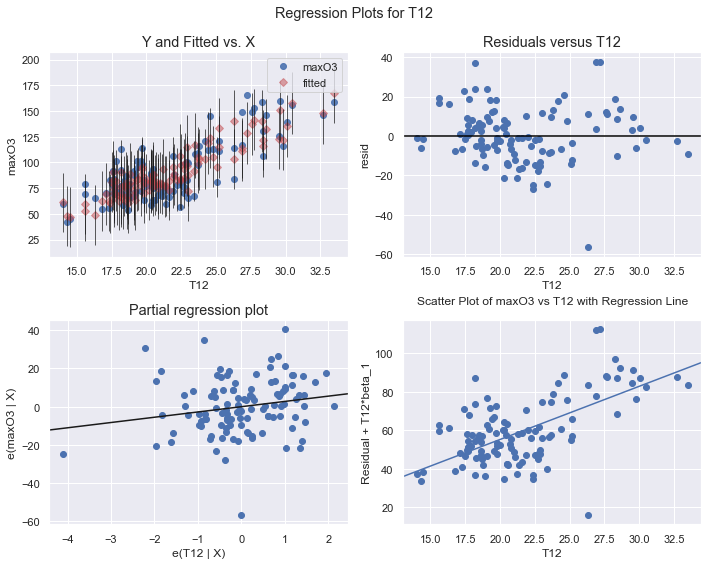

In [42]:
import statsmodels.api as sm

# Fit the linear regression model using OLS
model = sm.OLS(data['maxO3'], data[['T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'maxO3v']])
results = model.fit()

# Create a scatter plot of the data with the regression line
fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_regress_exog(results, 'T12', fig=fig)
plt.title("Scatter Plot of maxO3 vs T12 with Regression Line", y=1.05)
plt.show()


the code renders 4 different subplots, the first one is the scatterplot of the data and the regression line, the second one is the residuals plot, the third one is the probability plot, and the fourth one is the leverage plot. Each of these plots provides different information about the regression model, and together they can help to determine the quality of the model.